In [1]:
import pandas as pd
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # to get rid of warnings

## Data Understanding

In [3]:
df=pd.read_csv('penguins_cleaned.csv')
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Check if there are any missing values 

In [5]:
df.isna().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### Missing data present 

In [7]:
df.shape

(344, 7)

In [8]:
df.dropna(inplace=True)

### Missing data handled

In [9]:
df.shape

(334, 7)

In [10]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [11]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


In [12]:
df.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.817295,-2.456922,49.932218,2588.842967
culmen_depth_mm,-2.456922,3.872668,-15.969677,-749.137985
flipper_length_mm,49.932218,-15.969677,196.621397,9854.668816
body_mass_g,2588.842967,-749.137985,9854.668816,647761.194952


In [13]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


## Univariate Analysis

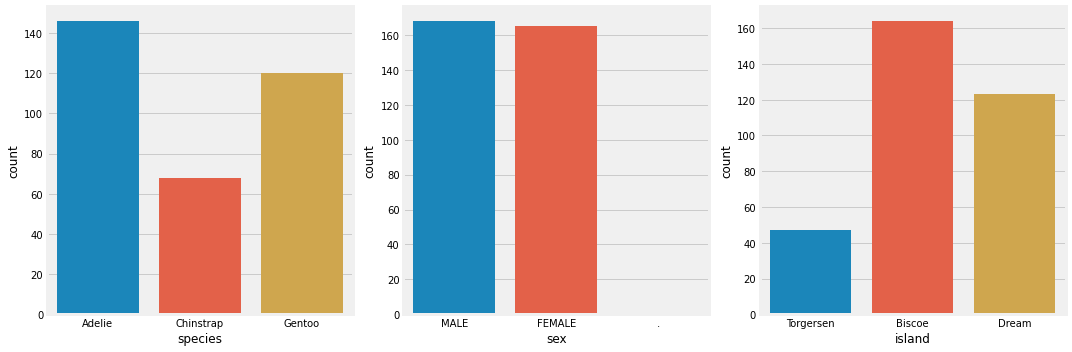

In [14]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='species')
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='sex')
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='island')
plt.tight_layout()
plt.show()

Let's explore distribution of our data.


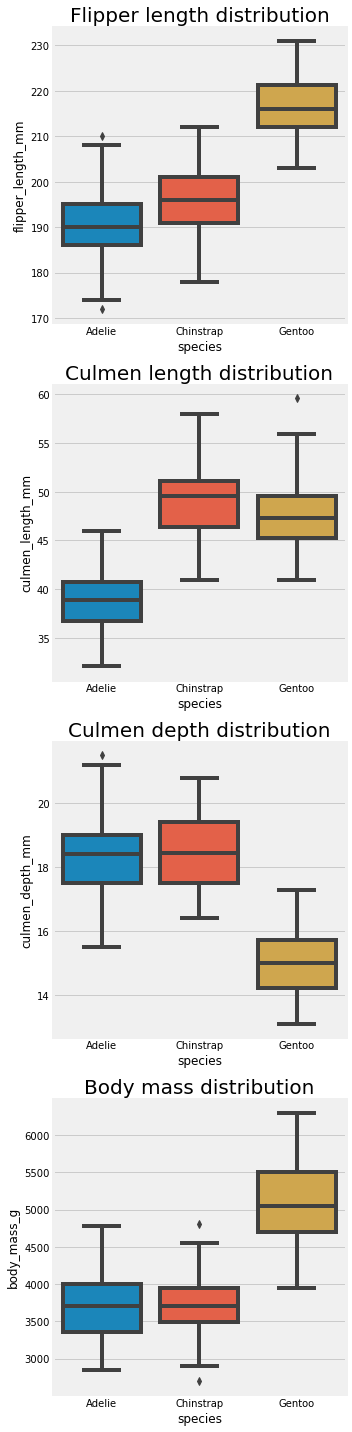

In [15]:
print("Let's explore distribution of our data.")
fig,axes=plt.subplots(4,1,figsize=(5,20))

sns.boxplot(x='species',y='flipper_length_mm',ax=axes[0],data=df)
axes[0].set_title("Flipper length distribution",fontsize=20)

sns.boxplot(x='species',y='culmen_length_mm',ax=axes[1],data=df)
axes[1].set_title("Culmen length distribution",fontsize=20)

sns.boxplot(x='species',y='culmen_depth_mm',ax=axes[2],data=df)
axes[2].set_title("Culmen depth distribution",fontsize=20)

sns.boxplot(x='species',y='body_mass_g',ax=axes[3],data=df)
axes[3].set_title("Body mass distribution",fontsize=20)

plt.tight_layout();

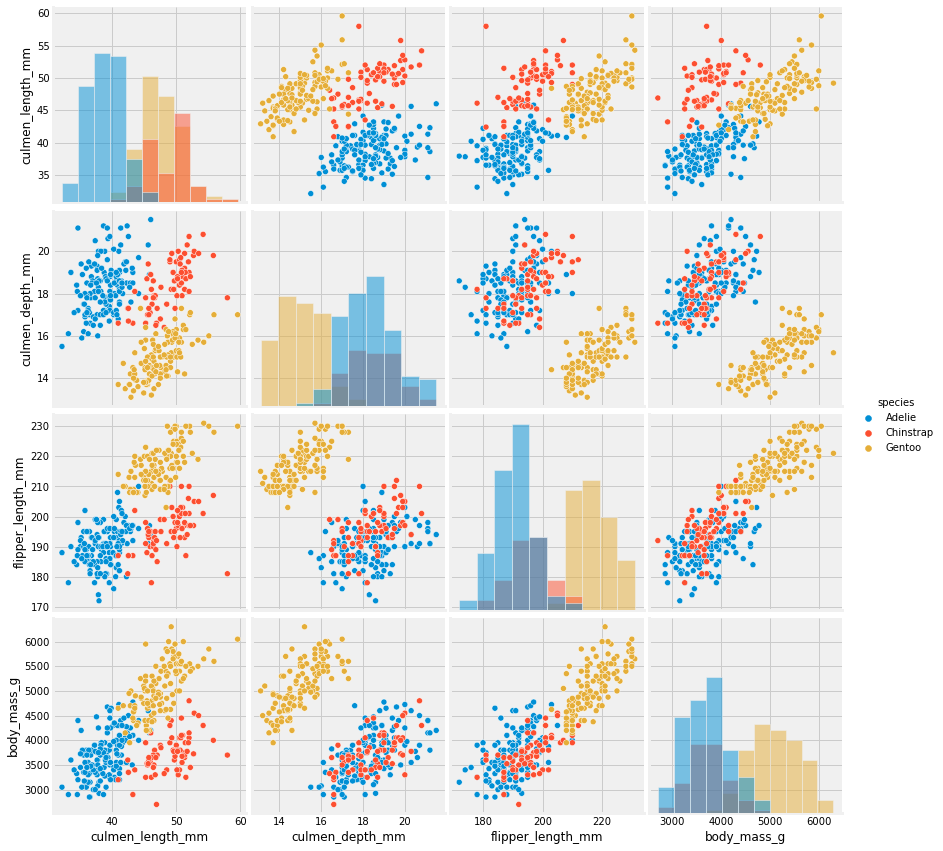

In [16]:
sns.pairplot(data=df[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()

## Display Correlation Matrix 

Text(0.5, 1.0, 'Correlation Matrix for Palmer Penguins')

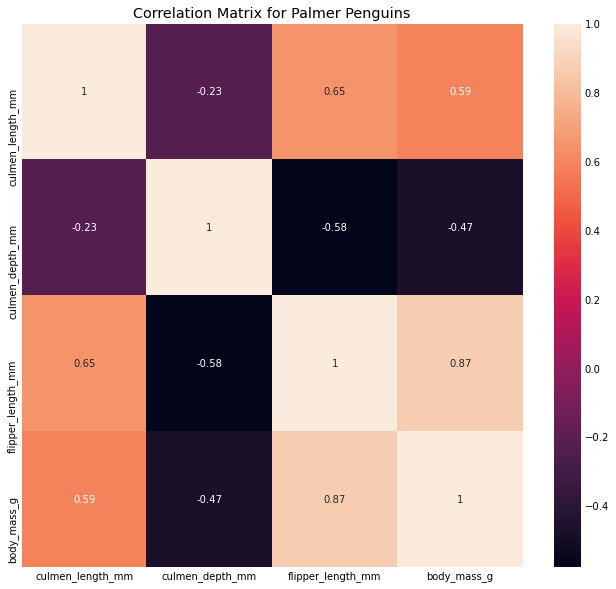

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix for Palmer Penguins')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 30.9+ KB


## Data preprocessing

In [19]:
le = LabelEncoder()
cat_col = ['species','sex', 'island']
for var in cat_col:
    df[var]=le.fit_transform(df[var].astype('str'))

## Display Correlation Matrix 

Text(0.5, 1.0, 'Correlation Matrix for Palmer Penguins')

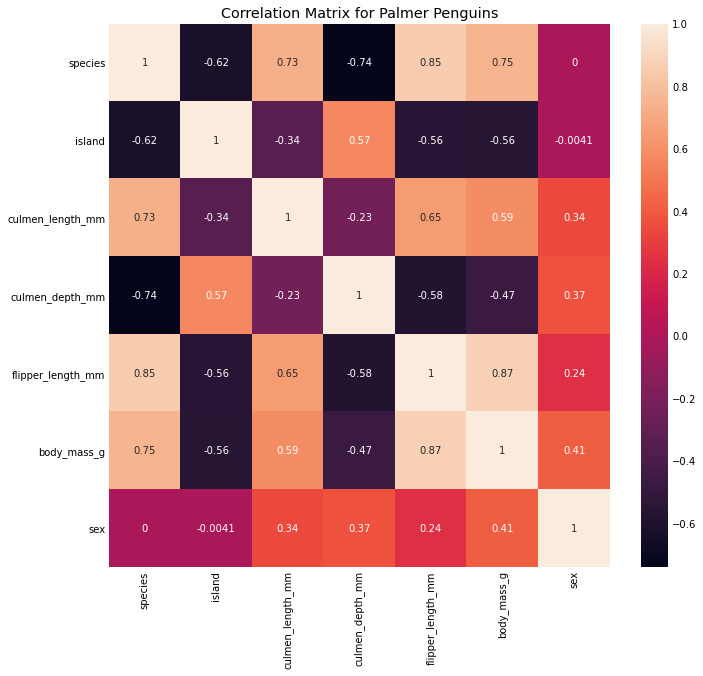

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix for Palmer Penguins')

In [21]:
X = df.drop(columns=["species"])
y = df.species.values

## Train-Test Split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Building Logistic Regression

In [23]:
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)
lr_prediction = model.predict(X_test)

## Building Support Vector Machine

In [24]:
model = svm.SVC()
model.fit(X_train,y_train)
svc_prediction = model.predict(X_test)

## Building Decision Tree Classifier

In [25]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)
dt_prediction  = dt.predict(X_test)

## Building KNN Classifier

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_prediction = knn.predict(X_test)

## Building Random Forest Classifier

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
randomforestclassifier_prediction = rfc.predict(X_test)

In [28]:
print('Logistic Regression accuracy = ', accuracy_score(lr_prediction,y_test))
print('SVM accuracy = ',accuracy_score(svc_prediction,y_test))
print('Decision Tree accuracy = ', accuracy_score(dt_prediction,y_test))
print('KNN accuracy = ', accuracy_score(knn_prediction,y_test))
print("RandomForestClassifier = ",accuracy_score(randomforestclassifier_prediction,y_test))

Logistic Regression accuracy =  0.9702970297029703
SVM accuracy =  0.7524752475247525
Decision Tree accuracy =  0.9603960396039604
KNN accuracy =  0.7920792079207921
RandomForestClassifier =  0.9801980198019802


## Conclusion
- The Species column is heavily dependent on the 'flipper_length_mm','body_mass_g','culmen_length_mm' for Predictions as observed from the correlation matrix.
- The Random Forest Classifier gives us the maximum Accuracy of 98% compared to the other 4 Machine Learning Classification Algorithms.